Successful
Successful
Successful


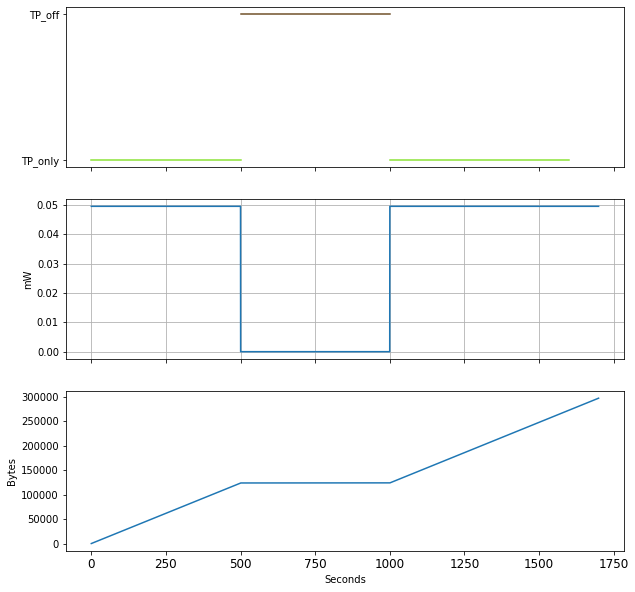

In [1]:
from TP import TP
time_step = 0.0155
duration = 1700

Thermo = TP(time_step, duration, loop_rate=20)
active_times = [(0,500,"TP_only"), (500,1000,"TP_off"), (1000, 1600,"TP_only")]
tp_time, tp_power, tp_data = Thermo.runSim(active_times)


[(0, 15, 'TP_only'), (15, 30, 'TP_only'), (30, 45, 'TP_only'), (45, 60, 'TP_only'), (60, 75, 'TP_only'), (75, 90, 'TP_only'), (90, 105, 'TP_only'), (105, 120, 'TP_only'), (120, 135, 'TP_only'), (135, 150, 'TP_only'), (150, 165, 'TP_only'), (165, 180, 'TP_only'), (180, 195, 'TP_only'), (195, 210, 'TP_only'), (210, 225, 'TP_only'), (225, 240, 'TP_only'), (240, 255, 'TP_only'), (255, 270, 'TP_only'), (270, 285, 'TP_only'), (285, 300, 'TP_only'), (300, 315, 'TP_only'), (315, 330, 'TP_only'), (330, 345, 'TP_only'), (345, 360, 'TP_only'), (360, 375, 'TP_only'), (375, 390, 'TP_only'), (390, 405, 'TP_only'), (405, 420, 'TP_only'), (420, 435, 'TP_only'), (435, 450, 'TP_only'), (450, 465, 'TP_only'), (465, 480, 'TP_only'), (480, 495, 'TP_only'), (495, 510, 'TP_only'), (510, 525, 'TP_only'), (525, 540, 'TP_only'), (540, 555, 'TP_only'), (555, 570, 'TP_only'), (570, 585, 'TP_only'), (585, 600, 'TP_only'), (600, 615, 'TP_only'), (615, 630, 'TP_only'), (630, 645, 'TP_only'), (645, 660, 'TP_only'), (

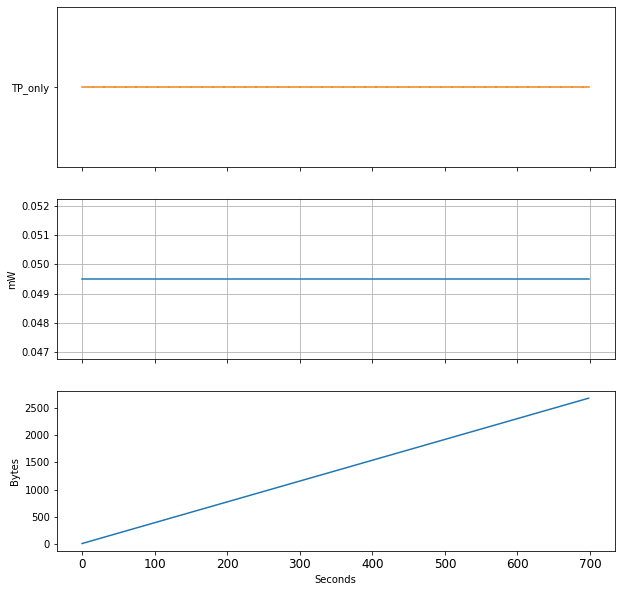

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [2]:
def generateActiveList(total_time: float, modedict:dict, **kwargs) -> list:
    #frequency should be in hz. duration should be in seconds
    finalArr = []
    curTime = 0
    flag = False
    while curTime < total_time:
        for key in modedict:
            if curTime+modedict[key]>total_time:
                flag = True
                break
            finalArr.append((curTime, curTime+modedict[key], key))
            curTime += modedict[key]
        if flag: 
            break
    mode = len(finalArr) % len(modedict)
    if finalArr[-1][1] > total_time:
        finalArr[-1] = (finalArr[-1][0], total_time, list(modedict.keys())[mode])
    elif finalArr[-1][1] < total_time:
        finalArr.append((finalArr[-1][1], total_time, list(modedict.keys())[mode]))
    print(finalArr)
    return finalArr

modedict = {"TP_only":15, "TP_only":15,"TP_only":15}
active_times = generateActiveList(total_time=699, modedict=modedict)
Thermo2 = TP(time_step=1, duration=699, loop_rate=20)

Thermo2.runSim(active_times)


